# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor


### Bagging을 사용한 분류

#### 데이터셋 불러오기

#### KNN

##### 붓꽃 데이터

In [6]:
iris = load_iris()


In [7]:
base_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [8]:
cross_val = cross_validate(estimator=base_model, X=iris.data, y=iris.target)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.0007762432098388672
0.0007374286651611328
0.96


In [9]:
cross_val = cross_validate(estimator=bagging_model, X=iris.data, y=iris.target)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.006901168823242187
0.002098226547241211
0.9399999999999998


##### 와인 데이터

In [10]:
wine = load_wine()

cross_val = cross_validate(estimator=base_model, X=wine.data, y=wine.target)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.000521087646484375
0.0007735252380371094
0.9493650793650794


In [11]:
wine = load_wine()

cross_val = cross_validate(estimator=bagging_model, X=wine.data, y=wine.target)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.00626063346862793
0.002143716812133789
0.9382539682539683


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [12]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


### Random Forests 분류

In [13]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())

In [15]:
cross_val = cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.06131386756896973
0.0027803897857666014
0.96


In [16]:
cross_val = cross_validate(estimator=model, X=wine.data, y=wine.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.04962358474731445
0.002817392349243164
0.9607936507936508


### Extremely Randomized Trees 분류

In [17]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())

In [18]:
cross_val = cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.037371492385864256
0.0028813838958740234
0.9533333333333334


In [19]:
cross_val = cross_validate(estimator=model, X=wine.data, y=wine.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.037612295150756835
0.0028674125671386717
0.9665079365079364


avg fit time: 0.1559168815612793 (+/- 0.002655457394132586)
avg score time: 0.008100175857543945 (+/- 0.0006419414393635727)
avg test score: 0.4350362956842 (+/- 0.032315648350392946)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn-v0_8-whitegrid"])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier


In [26]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [46]:
iris = load_iris()
plot_idx = 1
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
]


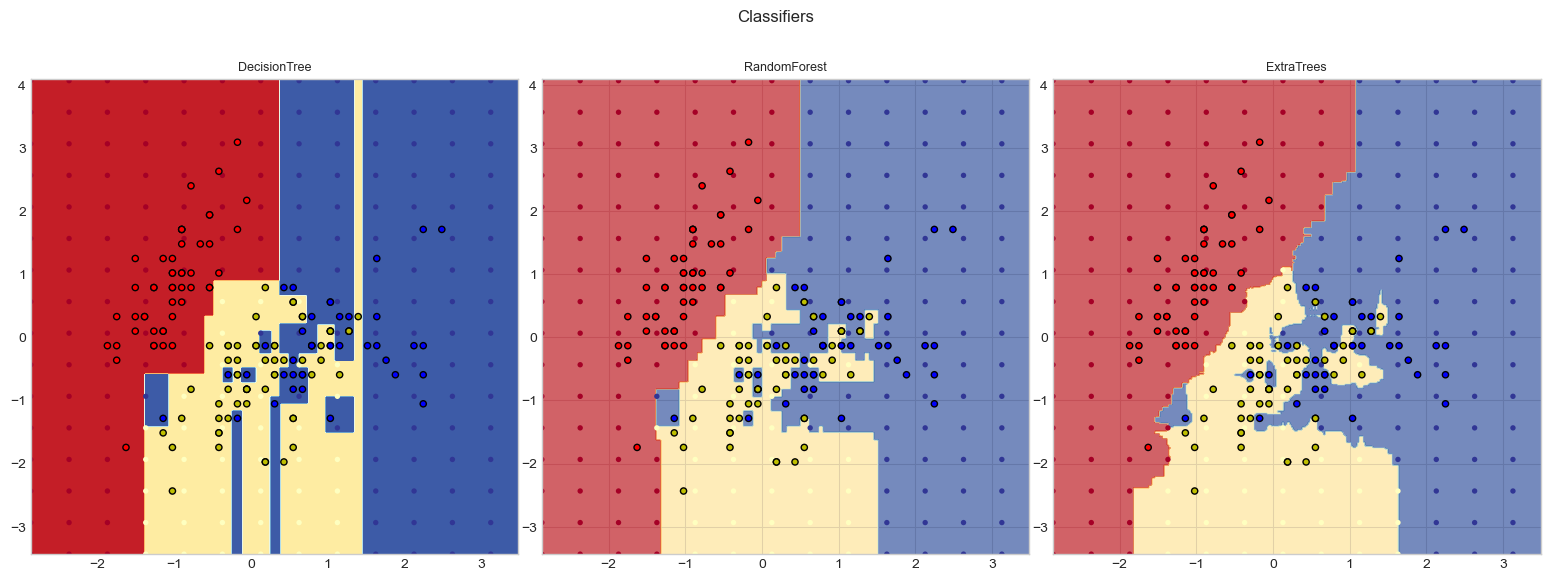

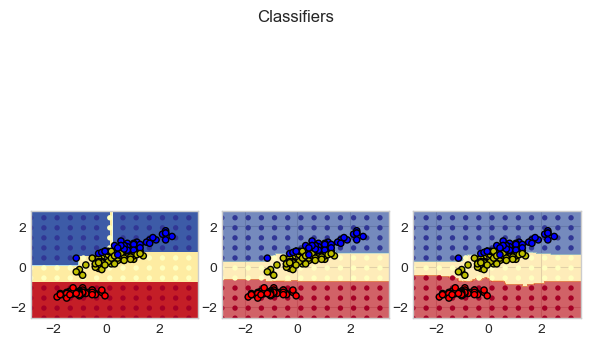

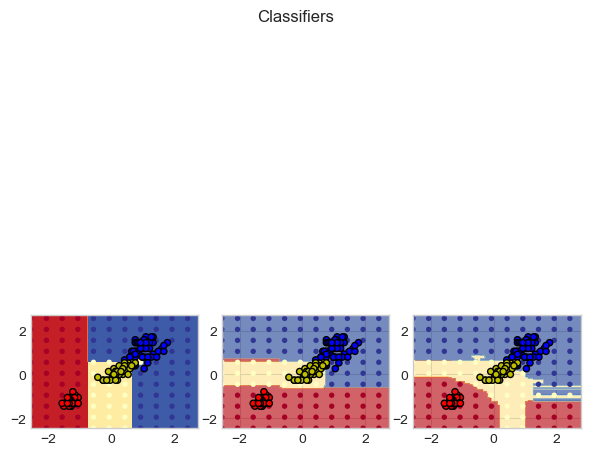

In [47]:
plt.figure(figsize=(16, 16))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        model.fit(X, y)

        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=estimator_alpha)
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolors="k",
            s=20,
        )
        plot_idx += 1
    plt.suptitle("Classifiers", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()


In [58]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


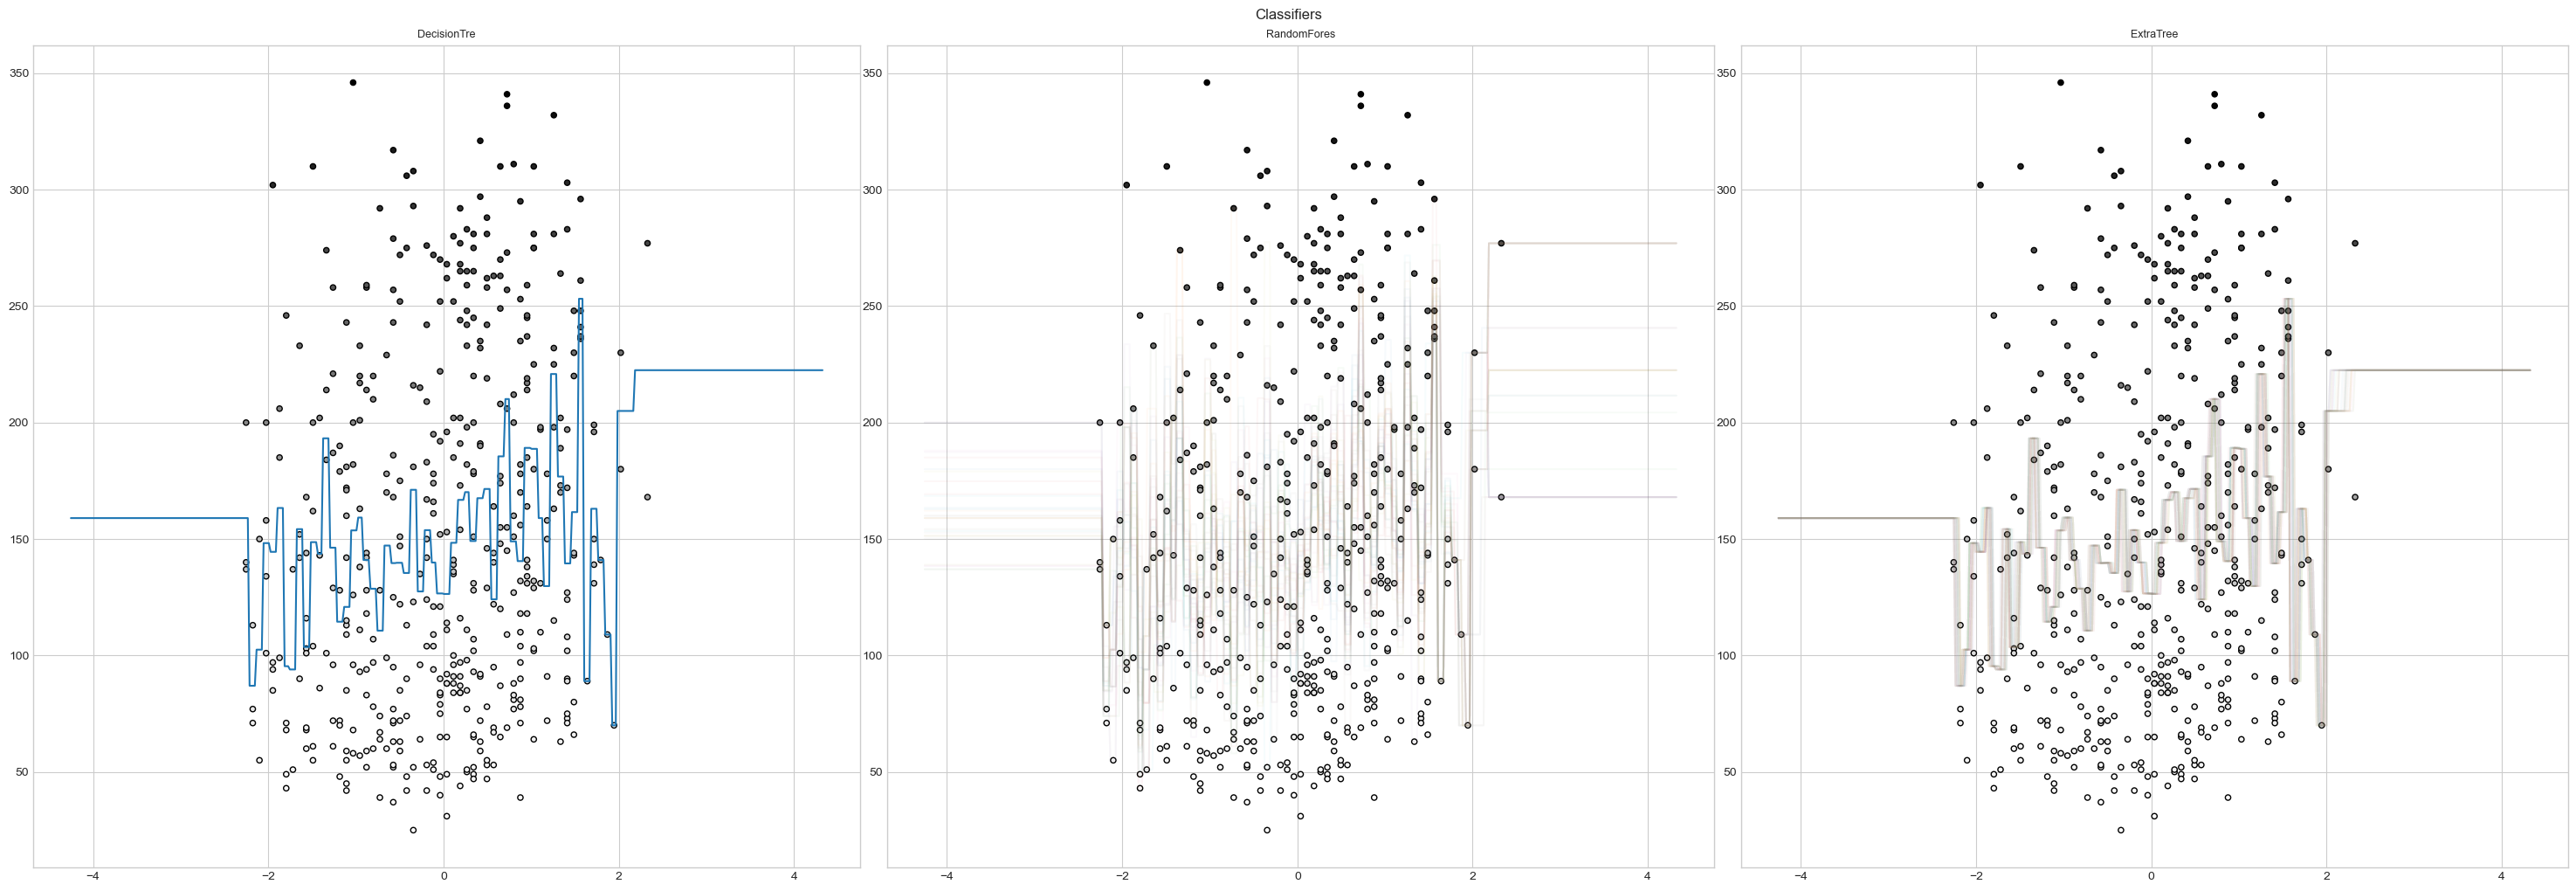

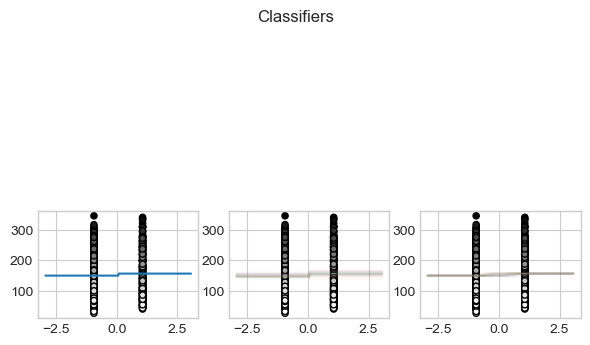

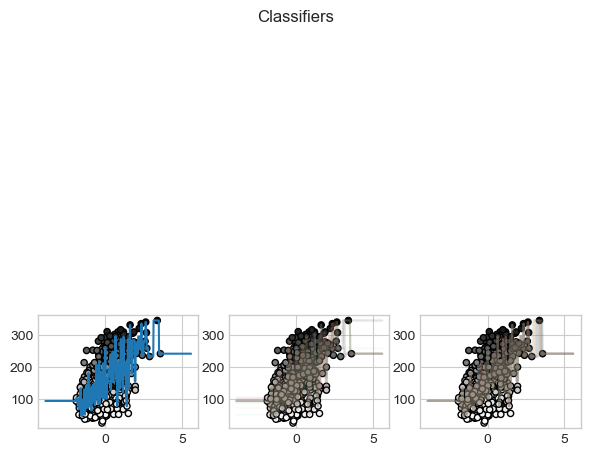

In [67]:
plot_idx = 1
models = [
    DecisionTreeRegressor(max_depth=None),
    RandomForestRegressor(n_estimators=n_estimators),
    ExtraTreesRegressor(n_estimators=n_estimators),
]

plt.figure(figsize=(30, 30))
for pair in (0, 1, 2):
    for model in models:
        X = diabetes.data[:, pair]
        y = diabetes.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        model.fit(X.reshape(-1, 1), y)

        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min() - 1, X.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.arange(x_min - 1, x_max + 1, plot_step), np.arange(
            y_min, y_max + 1, plot_step
        )

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
        plt.scatter(X, y, c=y, edgecolors="k", s=20)
        plot_idx += 1
    plt.suptitle("Classifiers", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()


## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())
cross_val = cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.02931804656982422
0.002108049392700195
0.9466666666666667


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(StandardScaler(), GradientBoostingClassifier())
cross_val = cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.08180704116821289
0.0005970954895019531
0.9666666666666668


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [71]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


In [72]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[("svc", model1), ("naive", model2), ("forest", model3)], voting="hard"
)

In [75]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split(".")[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print(
        "Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name)
    )

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [76]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[("svc", model1), ("naive", model2), ("forest", model3)],
    voting="soft",
    weights=[2, 1, 2],
)

In [77]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split(".")[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print(
        "Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name)
    )

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 분류

In [87]:
from sklearn.ensemble import StackingClassifier


In [90]:
estimators = [("svc", SVC()), ("GNB", GaussianNB())]

clf = make_pipeline(
    StandardScaler(),
    StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier()),
)

In [91]:
cross_val = cross_validate(estimator=clf, X=iris.data, y=iris.target, cv=5)
print(cross_val["fit_time"].mean())
print(cross_val["score_time"].mean())
print(cross_val["test_score"].mean())

0.055603742599487305
0.003167867660522461
0.9466666666666667


avg fit time: 0.2862356185913086 (+/- 0.007009096495986199)
avg score time: 0.008571338653564454 (+/- 0.00010991095462228061)
avg test score: 0.96 (+/- 0.024944382578492935)


In [7]:
r = int(input())

ans = (r ** 2) * 3.14
if ans % 1 == 0:
    print(int(ans))
else:
    print(f'{ans:g}')

78.5
